# CRISP DM

# Bussines Understanding

- Problem
dataset (https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset) yang Saya gunakan dari kaggle mengenai Bank Marketing campaign yang ada di Portugal ini yaitu telah terjadi penurunan pendapatan untuk bank Portugal dan ingin tahu tindakan apa yang harus diambil. Setelah dilakukan penyelidikan dengan memprediksi dan mengevauasi data ini dapat diketahui bahwa akar penyebab yang ditemukan adalah klien mereka tidak menyetor sesering sebelumnya. Akibatnya, bank Portugal ingin mengidentifikasi para klien yang memiliki kesempatan lebih tinggi untuk berlangganan deposito berjangka dan memfokuskan upaya pemasaran pada klien tersebut, agar bank dapat berinvestasi dalam produk keuangan dengan keuntungan lebih tinggi. Selain itu, bank juga memiliki keuntungan dan kesempatan meningkatkan pendapatan yang lebih baik untuk membujuk klien deposito berjangka agar dapat membeli produk lain seperti dana atau asuransi.

- Tujuan
pengumpulan data ini untuk menggambarkan hasil prediksi kampanye pemasaran bank Portugal dengan membuat klasifikasi menggunakan algoritma K-nearest Neighbor dan juga membantu mempersempit prospek mereka ke saluran pemasaran dan pada akhirnya melakukan setoran berjangka. Kampanye yang dilakukan sebagian besar didasarkan pada panggilan telepon langsung, menawarkan klien bank untuk menempatkan deposito berjangka. Jika setelah semua menandai klien telah setuju untuk menempatkan deposit - variabel target ditandai 'ya', jika tidak setuju maka di tandai dengan 'tidak'.

# Data Understanding

0. age : usia klien.
1. job : tipe job klien, berikut beberapa tipe job berdasarkan label numerik dan kategori :

                - blue-collar : 1
                - admin : 0
                - technician : 9
                - services : 7
                - management : 4
                - housemaid : 3
                - entrepreneur : 2
                - retired : 5
                - self-employed : 6
                - unknown : 11
                - unemployed : 10
                - student : 8

2. marital : status yang menggambarkan hubungan setiap klien dengan orang pentingnya. Berikut beberapa status hubungan berdasarkan label numerik dan kategori :

                - married : 1
                - single : 2
                - divorced : 0
                - unknown : 3

3. education : pendidikan dari setiap klien yang dilakukan secara formal maupun non formal. Berikut beberapa status pendidikan berdasarkan label numerik dan kategori :

                - high.school : 3
                - university.degree : 5
                - basic.9y : 2
                - basic.4y : 0
                - unknown : 6
                - professional.course : 4
                - basic.6y : 1

4. default : kredit yang gagal di bayar oleh klien. 
5. housing : apakah klien mempunyai pinjaman di perumahan.
6. loan : pinjaman atau hutang yang dilakukan klien kepada bank.
7. contact : jenis Komunikasi klien dengan bank untuk kampanye ini.
8. month : bulan kontak terakhir dari kampanye ini dengan klien.
9. day_of_week : hari kontak terakhir kampanye bank marketing ini dengan klien.
10. duration : durasi waktu kontak berakhir. Semakin lama durasi panggilan, mereka memiliki probabilitas lebih tinggi dalam melakukan deposit. Durasi panggilan berakhir karena periode waktu kampanye diperpanjang lebih lanjut.
11. campaign : jumlah kontak yang dilakukan selama kampanye dan untuk klien.
12. pdays : jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya.
13. previous : jumlah kontak yang dilakukan sebelum kampanye dan untuk klien.
14. poutcome : hasil dari kampanye pemasaran sebelumnya.
15. emp.var.rate : employment variation rate (tingkat variasi pekerjaan), menandakan bahwa mereka telah melakukan kampanye ketika ada pergeseran pekerjaan yang tinggi karena kondisi ekonomi.
16. cons.price.idx : Consumer price index (harga konsumen index), menunjukkan prospek di mana memiliki harga untuk membayar barang dan jasa yang dapat merangsang prospek ini untuk melakukan setoran dan menanam gagasan penghematan.
17. cons.conf.idx : Indeks kepercayaan konsumen cukup rendah karena mereka tidak memiliki banyak kepercayaan pada ekonomi yang berfluktuasi.
18. euribor3m : Suku bunga Euribor 3 bulan adalah suku bunga di mana bank-bank Eropa pilihan saling meminjamkan dana dalam mata uang euro yangmemiliki jatuh tempo 3 bulan.
19. nr.employed : Jumlah karyawan juga berada di puncak yang dapat meningkatkan indeks pendapatan mereka dan bisa menjadi alasan kampanye menargetkan prospek dipekerjakan untuk melakukan deposit.
20. y : label output dari data ini, yang menandakan apakah klien berlangganan deposito berjangka (1) atau tidak (0)

# Import library

In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv("bank-additional-full.csv")

In [123]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             599 non-null    int64  
 1   job             599 non-null    object 
 2   marital         599 non-null    object 
 3   education       599 non-null    object 
 4   default         599 non-null    object 
 5   housing         599 non-null    object 
 6   loan            599 non-null    object 
 7   contact         599 non-null    object 
 8   month           599 non-null    object 
 9   day_of_week     599 non-null    object 
 10  duration        599 non-null    int64  
 11  campaign        599 non-null    int64  
 12  pdays           599 non-null    int64  
 13  previous        599 non-null    int64  
 14  poutcome        599 non-null    object 
 15  emp.var.rate    599 non-null    float64
 16  cons.price.idx  599 non-null    float64
 17  cons.conf.idx   599 non-null    flo

# Data Preparation

# Transformasi Data

In [125]:
# memisahkan numerik dan kategori
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == 'int64':
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [126]:
numerical

['age', 'duration', 'campaign', 'pdays', 'previous', 'nr_employed']

In [127]:
catgcols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'y']

In [128]:
df.loc[:,"y"].value_counts()

no     586
yes     13
Name: y, dtype: int64

In [129]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [130]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,0,0,0,0,...,1,999,0,0,0,0,0,0,5191,0
1,57,7,1,3,1,0,0,0,0,0,...,1,999,0,0,0,0,0,0,5191,0
2,37,7,1,3,0,2,0,0,0,0,...,1,999,0,0,0,0,0,0,5191,0
3,40,0,1,1,0,0,0,0,0,0,...,1,999,0,0,0,0,0,0,5191,0
4,56,7,1,3,0,0,2,0,0,0,...,1,999,0,0,0,0,0,0,5191,0


In [131]:
df.loc[:,"y"].value_counts()

0    586
1     13
Name: y, dtype: int64

In [132]:
df.to_csv('campaignsbank.csv')

# Visualisasi Data

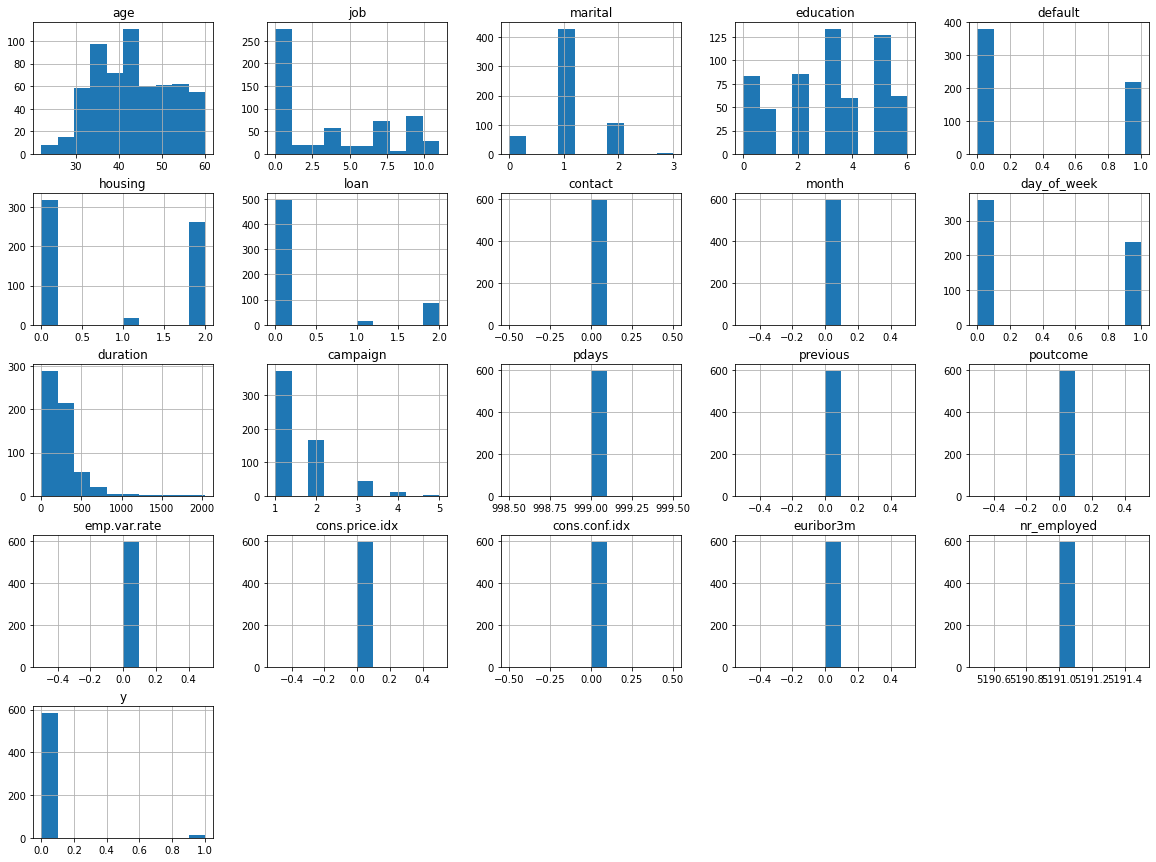

In [133]:
p = df.hist(figsize = (20, 15))

0    586
1     13
Name: y, dtype: int64

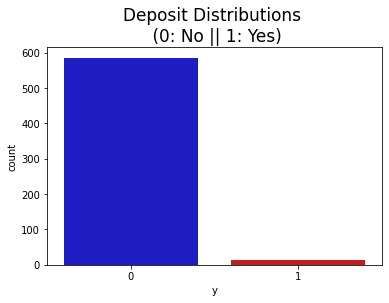

In [134]:
import seaborn as sns

colors = ["#0101DF", "#DF0101"]

sns.countplot(x = "y", data = df, palette = colors)
plt.title('Deposit Distributions \n (0: No || 1: Yes)', fontsize = 17)
df.loc[:,"y"].value_counts()

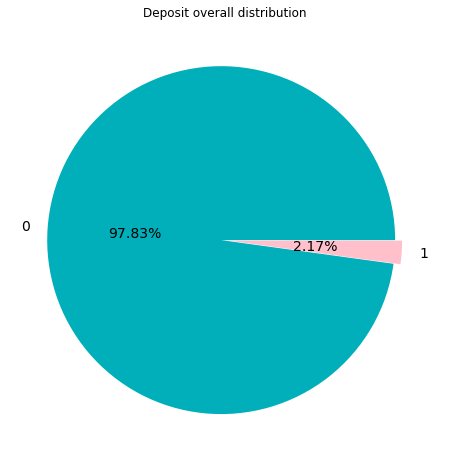

In [135]:
pie, ax = plt.subplots(figsize=[10,8])
labels = [0, 1]
colors = ['#00afb9', 'pink']
plt.pie(x = df['y'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Deposit overall distribution')
plt.show()

# Split data

In [136]:
X = df.drop(columns=['y', 'job', 'education', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'], axis=1)
Y = df['y']

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [138]:
print(X.shape, x_train.shape, x_test.shape)

(599, 15) (479, 15) (120, 15)


# Modelling Data

### Membuat model training

In [139]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [140]:
model = knn.fit(x_train, y_train)

# Evaluation

### Evaluasi model

In [141]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [142]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.9812108559498957


In [143]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [144]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  1.0


# Model Prediksi

In [145]:
input_data = (56, 1, 0, 0, 2, 0, 0, 0, 307, 1, 999, 0, 0, 0, 5191)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Klien Tidak Berlangganan Deposit Berjangka')
else:
    print('Klien Berlangganan Deposit Berjangka')

[0]
Klien Tidak Berlangganan Deposit Berjangka


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Deployment

### Save Model

In [146]:
import pickle

filename = 'bankmarketing.sav'
pickle.dump(model, open(filename, 'wb'))